# Transfer Learning 🌆🌆

By now you must have realized that training neural networks to analyse images is hard and takes a really long time or very high performance hardware! Would not it be great if we could models that others have built in oder to gain time on training as well as get better results? Well you knocked on the right door, because this is exactly what transfer learning is for!

## What will you learn in this course? 🧐🧐

In this lesson you learn about transfer learning and how it can let you attain very high prediction performance without having to train a model from scratch, and therefore save yourself the time and ressources needed to train a very deep neural network.

* Principle of transfer learning
* Imagenet presentation
* Tf model API -> presentation of different achitecture provided by tf
  * Convnet
  * ResNet
  * DenseNet
  * Inception
  * Inception-ResNet
  * AlexNet VGG
* Tensorflow Hub
* Fine tuning why and how ?
* Understand and interpret models with Grad Cam

## Principle of transfer learning

Transfer learning is based on a very simple idea: if you could find a model that has already been trained on an enormous amount of data, be it images or text or sound or any type of data you could think of, and that model reaches very high performance levels on the specific task it was trained for then the following conclusion may be reached. That model is able to extract features from that data that let it reach high prediction performances, and even though it has been trained on a specific task, we could assume that some layers in that neural network model are extracting features that could be used to predict other things from that data.

For example, picture a model that has trained on tons of images of daily life objects such as animals, plants, flowers, manufactured objects, people's pictures etc... And that this model is able to classify these objects into categories corresponding to the nature of the object present in the image. Then it would be fair to assume that prior to the prediction layer, the network is able to produce features that can be assembled to recognize those different objects. Then if you should want to use this model to classify different species of flowers from images, all you would have to do is remove the prediction layer from that model and replace it with a new layer that fits our flower classification problem and train that layer to use the features produced by the pre-trained model to make its predictions!

Let's further illustrate this idea with the figure below:

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/Transfer_learning.png" />

The model has been pre-trained on massive data and kindly made available for others to use. We take this model with all its optimized parameters, take out the last layer to replace with a layer that can predict our species of flowers and we train that last layer using flower images.

## Imagenet presentation

Imagenet is yearly deep learning competition. It proposes to participants a dataset comprising more than 14 Million images representing daily life objects organized in more than 21 thousand categories. The goal is to create and train a deep learning model that can achieve the best predictions with this dataset.

Quite evidently, this task demands enormous ressources in terms of hardware both memory-wise and computation-wise given the number of images and the complexity of the problem at hand, which is why only institutions equipped with supercalculators or enough ressources to rent such a machine are able to enter the competition with reasonnable chances of ranking highly.

You may find extensive information about imagenet on <a href="http://www.image-net.org/"> the official website</a>.

It is reasonnable to believe that models trained on such a problem would be perfect for transfer learning purposes. Thankfully, such models are made directly available by tensorflow's API! Great news right?


## Model architectures available in tensorflow

As we mentionned earlier, models trained on the imagenet dataset are available through the tensorflow API <a href="https://www.tensorflow.org/api_docs/python/tf/keras/applications"> here! </a>

In what follows, we will cover a few architectures you may find available in the API, you do not have to know this by heart but understanding these architectures will give you key ideas for understanding convolutional neural networks and tricks you may use to constraint the way your deep neural network models learn from the data.



### Convnet

In Standard ConvNet, the input image goes through multiple convolution and we obtain high-level features. This can be illustrated by the figure below:

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/classic_convnet.png" />

However, it often happens that in images the patterns we are looking for in order to make good prediction cannot all be found at the same level. Take these three pictures of dogs for example:

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/dog-190056_1280.jpg" />

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/dog-3277416_1920.jpg" />

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/dog-838281_1920.jpg" />

In the first image, the dog is pretty small compared to the whole size of the picture, therefore the amount of convolution layers needed to detect the dog is not so high. In the second image, we only see the dog's head and it's much more zoomed in, therefore it would take more convolution layers in order to form patterns of that size. And in the third image, the dog takes up most of the space in the image and is cropped, the number of convolution layers needed to detect this dog head pattern would be even bigger.

A solution for that would be to zoom in and crop all our images in order to be able to have collections of images that are very similar to each other and make it that much easier for our models to perform well. This is possible with object detection models, that learn to draw bounding boxes around objects in images before running classification, but the major drawback to this technique is that building a training set for object detection is a lot harder than finding a dataset for classification (since you would have to draw the bounding boxes for the training example somehow).

Alternatively, if there was a way to let the model base its predictions on patterns from various complexity levels, it would probably perform better. This is one of the central ideas we will be exploring with these pretrained models' architectures.

### ResNet

In ResNet, identity mapping is proposed to promote the gradient propagation. Element-wise addition is used. It can be viewed as algorithms with a state passed from one ResNet module to another one.

This identity mapping can be explained with the below figure:

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/resnet.png" />

The idea is that the input image goes through a concolutional layer but is also kept intact and added to the result of the convolution layer. It's like adding a filter on top of the original image.

This lets the network use both high and low level features contained in the same input. This makes it easier for the gradient to flow back to the bottom-most layers of the network, and therefore makes it possible to build much deeper neural networks.

### DenseNet

Resnets were a true revolution in the field of image analysis with deep learning, but yet better and more efficient architectures have since been invented. Densenets for example:

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/densenet.png" />

In DenseNet, each layer obtains additional inputs from all preceding layers and passes on its own feature-maps to all subsequent layers. Concatenation is used. Each layer is receiving a “collective knowledge” from all preceding layers.

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/densenet_growth_rate.png" />

Since each layer receives feature maps from all preceding layers, network can be thinner and compact, i.e. number of channels can be fewer. The growth rate k is the additional number of channels for each layer.

So, it has higher computational and memory efficiency. The following figure shows the concept of concatenation during forward propagation:

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/concatenation_mecanism.gif" />

As you can see the features extracted by each layer persists all through the network, enabling the prediction layer to benefit from multiple levels of feature complexity!

The following figure illustrates feature complexity in a simple feed-forward network also called classic connectivity:

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/classic_connectivity.png" />

This figure shows what happens hen switching to dense connectivity.

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/dense_connectivity.png" />

Thanks to this new connectivity pattern, densenet caused a huge leap forward in the field of image processing, however it's still very much perfectible especially in terms of computing efficiency, and that's where the inception architecture comes in!

### Inception

The underlying problem behind inception is pretty much the same as the one solved with densenet, except the strategy is a little different. Important patterns in images vary in sizes, therefore picking the right kernel size for our convolution layers becomes tricky.

Larger kernel sizes are better at digging out information distributed globally, smaller kernel sizes are better at detecting local information.

So why not process the image simultaneously with several layers each with different kernel sizes?

The "naive" inception module presented in the figure below performs convolution on an input using three different kernel sizes: $1 \times 1$, $3 \times 3$, $5\times5$, it also performs maxpooling. The different outputs are then concatenated and sent to the next inception module.

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/inception_module_naive.png" />

The issue with this version of the inception module is that the convolution layers will have weights for each incoming channel, which can greatly increase computation time. The idea for inception 2 is to reduce computation time by adding $1 \times 1$ convolution layers before bigger convolutional layers so that the incoming channels are reduced to one channel instead!

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/inception_dimension_reduction.png" />

In order to further reduce the number of computations needed, a variant of inception 2 was proposed where we replace the $5\times5$ convolutional layer with two stacked $3\times3$ convolutional layers!

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/inception_v2.png" />

Another interesting idea to even further reduce the amount of computation needed is to not use 2D convolution directly but to replace it with convolution over one dimension after the other!

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/inception_v2_better.png" />

Another variation uses wider structure by seperating the "width" and "height convolutions".

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/inception_v2_wider.png" />

Inception network architectures introduced great ideas in order to make models work better and more efficiently while being able to detect various levels of feature complexity in images. Additionally, their architecture is compatible with resnet. Leading to, you guessed it: Inception Resnet!


### Inception-ResNet

Inception resnet architecture consists in a succession of inception modules, except the input of each module is summed withthe output of that same module before being passed on to the next.

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/inception_resnet.jpeg" />

### MobileNet

The MobileNet architecture was created in order to achieve the highest possible performance while maintaining the lightest deep learning model, both in terms of storage, and computation at inference.

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/mobilenet.png" />

As you can see in the figure, convolution in MobileNets is first applied depthwise, the filter consists in a single set of weights is applied to all channels of the input (versus one filter contains a set of weights per channel in classic convolution). Then pointwise convolution happens, which simply consists in calcultating a weighted sum of all the channels.

This results in a very light weight architecture compared to other models while maintaining decent levels of performance. This is particularly useful for models that need to be stored in mobile applications or embedded systems.

## Fine tuning

If you would like to try and improve your deep learning based on transfer learning, fine tuning is a technique that can help you achieve this. The idea is very simple and the easiest way to understand it is by comparing classical transfer learning and fine tuning:

* **Transfer learning**: The model with pre-trained weights is not trainable it is used only as a feature engineering function.
* **Fine tuning**: Instead of freezing the entire architecture of the pre trained model, we can let some of the last layers train on the new data and move away from the pre trained weights to adapt to the new problem.

The figure below gives you a visual idea of how fine tuning works:

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/M08-DeepLearning/Fine_tuning.png" />

There are several reasons why we usually let the last layers train instead of the first layer:
* The last layers contain features that will be directly used by the prediction layer in order to make its predictions, so they are much more problem specific and data specific than what happens in the first layer.
* The last layers contain larger scale features that represent information on data that has higher chance of being data specific and problem specific, while first layers extract much smaller features on the input, which therefore have a higher chance of being more "all-purpose".
* The last layers are much closer to the predicition layer, so they are easier to train because the gradient won't have to many layers to go through during back propagation, whereas the first layers would be much harder to train.

The whole point of fine-tuning is figuring out how many layers towards the top of thenetwork you should let train in order to obtain a top-performing model.

In a separate demo notebook we will show you how to use transfer learning and fine tuning in practice.

## Understand and interpret model with Grad Cam

Gradient-weighted Class Activation Mapping, or Grad CAM, A technique for making Convolutional Neural Network (CNN)-based models more transparent by visualizing the regions of input that are “important” for predictions from these models — or visual explanations.

The idea is to base ourselves on the last convolution layer in the architecture and use the gradients calculated according to the value (or the a category) of the target variable in order to visualize the area of importance on the input.

Let us see how it works in practice using a pre-trained model.

In [6]:
# We start by setting up the dependencies we will use

import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

The first step of Grad Cam is to train a convolutional neural network, or load a pre-trained network. We will focus on the last convolutional layer of the network, the one just before the flattenning of the outputs and the final prediction layers. We will base ourselves on this final convolutional layer to compute the Grad Cam.

We will also need an image input for the model to process in order to visualize on this image the regions of interest that the network will focus on to produce its prediction.

Let's go!

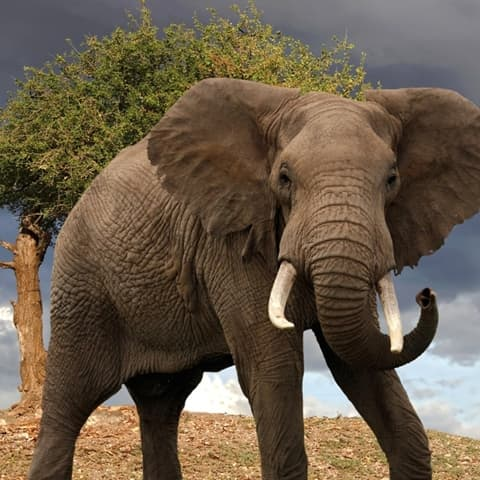

In [7]:
# Configurable parameters
# You can change these to another model.

# To get the values for last_conv_layer_name and classifier_layer_names, use model.summary() to see the names of all layers in the model.

model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]

# The local path to our target image
img_path = keras.utils.get_file(
    "african_elephant.jpg",  "https://larousse.fr/encyclopedie/data/images/1309507-El%c3%a9phant.jpg" # " https://i.imgur.com/Bvro0YD.png"
)

display(Image(img_path))

Now that we loaded the pre-trained model and downloaded an example input image let's dive into the Grad Cam details.

The idea will be to decompose the model in two parts:

* The first half of the model all the way to the last convolutional layer, we call it `last_conv_layer_model`
* The second half of the model, comprising all the layers after the last conv layer all the way until the prediction layer, we'll call it `classifier_model`

We will then use the class `tf.GradientTape()` from tensorflow that can calculate and monitor gradients in neural network models.

We will compute the predictions of the model for the input image (this will be done in two steps, first the input goes into `last_conv_layer_model` and produces `last_conv_layer_output`, then `last_conv_layer_output` goes into `classifier_model` to produce the final output), and select the ouput neuron that corresponds to this predicted class (it is the most activated neuron on the last layer of `classifier_model`)

Then we calculate the gradient of `last_conv_layer_output` according to the most activated neuron. This will give us the elements of that last conv output that play that would make the most activated neuron's output vary the most (in other words, the most important parts of the conv output leading to that prediciton). Note that `last_conv_layer_output` is a tensor of shape (1, width, height, channels), where channels is the number of conv neurons on that last convolutional layer.

The gradient we just calculated has the same shape as the output, we will use it to evaluate the importance of each channel of `last_conv_layer_output`, therefore we compute the mean over each dimension but the channels to get the importance of each channel.

Each channel of `last_conv_layer_output` is multiplied by the channel importance we just calculated, and used to compute a weighted average of all the channels on `last_conv_layer_output`. This creates an object of shape (1, width, height, 1) that we will use at a heatmap to visualize on top of the input image after normalizing and resizing it to fit the input.



In [8]:
# The Grad-CAM algorithm
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


# ! Attention dans 07_deep_learning\06_Transfer_Learning\03-Caltech101_transfer_learning.ipynb
# Le prototype de la fonction est différent
# Ici j'ai renommé model en base_model pour être conforme avec l'autre fichier
# def make_gradcam_heatmap(img_array, base_model, model, last_conv_layer_name, classifier_layer_names):
def make_gradcam_heatmap(  img_array, base_model,        last_conv_layer_name, classifier_layer_names):
    
    
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer       = base_model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(base_model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = base_model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

All we have to do now is apply the mehtod we just described and obtain the heatmap that appears below!

In [9]:
# Let's test-drive it
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
base_model = model_builder(weights="imagenet")

# Print what the top predicted class is
preds = base_model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, base_model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()


35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.7160932)]


: 

After resizing, we superimpose it to the input image to visualize what the Grad Cam can tell us!

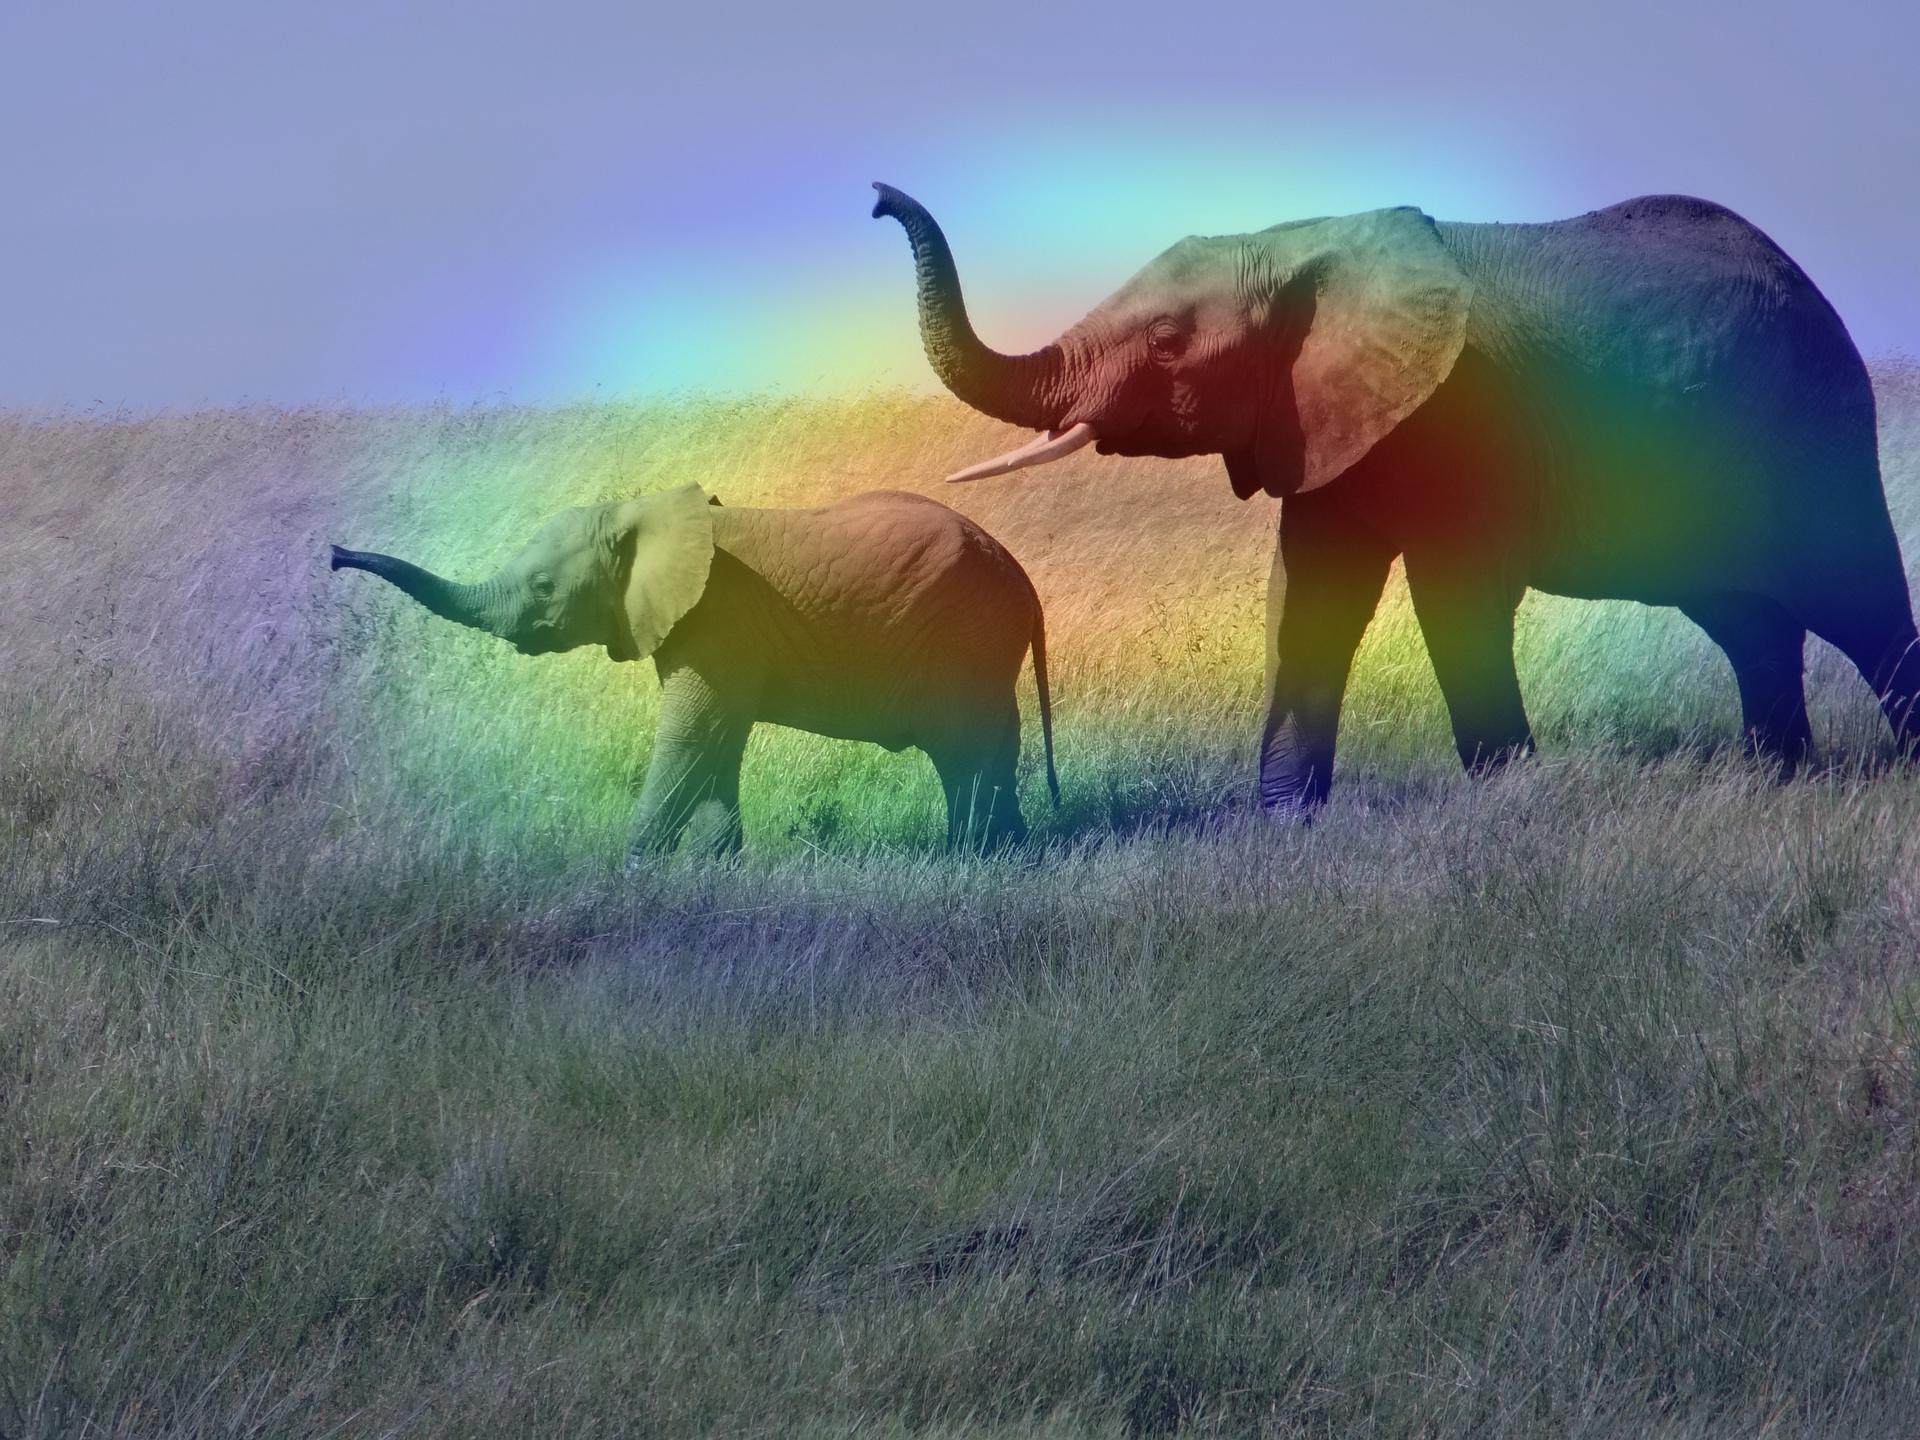

In [ ]:
# Create a superimposed visualization
# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "elephant_cam.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))

Impressive right? You can adapt this technique to other models and problems in order to understand what exactly in the input image helps your model make its predictions. This is very helpful because it will help you identify some biases in your images that would be very difficult to identify without this technique!

## Ressources 📚📚

* <a href="https://arxiv.org/abs/1512.03385">The original resnet paper</a>
* <a href="https://arxiv.org/abs/1608.06993">The original densenet paper</a>
* <a href="https://arxiv.org/abs/1512.00567v3">The original inceptionv3 paper</a>
* <a href="https://arxiv.org/abs/1704.04861">The original mobilenet paper</a>
* <a href="https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf"> The original Alexnet paper </a>
* <a href="https://arxiv.org/abs/1409.1556"> The original VGG paper</a>